/tmp/ipykernel_33405/3099645954.py:7: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  data = np.random.multivariate_normal(mean, cov_matrix, num_samples)


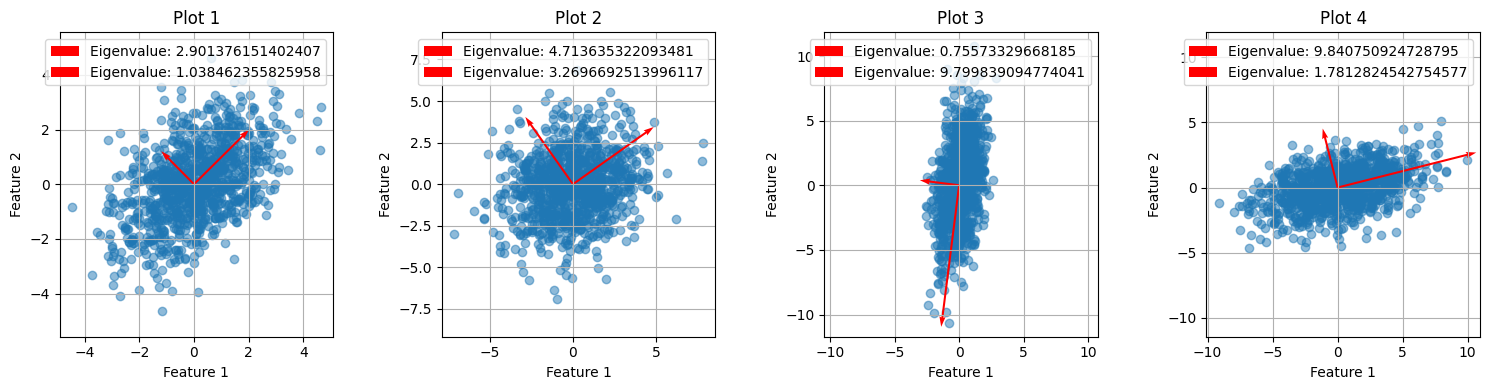

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def covarianceDecomposition(cov_matrix, mean, subplot_title):
    # Generate random data with 2 features
    num_samples = 1000
    data = np.random.multivariate_normal(mean, cov_matrix, num_samples)

    # Calculate covariance matrix
    cov_matrix = np.cov(data, rowvar=False)

    # Calculate eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    # Plot the data
    plt.scatter(data[:, 0], data[:, 1], alpha=0.5)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    # Plot eigenvectors with variance captured
    for i in range(len(eigenvalues)):
        variance = eigenvalues[i]
        scaled_eigenvector = np.sqrt(variance) * eigenvectors[:, i] / 2
        plt.quiver(*mean, *scaled_eigenvector, color='r', scale=3, label=f'Eigenvalue: {eigenvalues[i]}')

    plt.legend()
    plt.title(subplot_title)
    plt.axis('equal')
    plt.grid(True)

means = [[0,0], [0,0], [0,0], [0,0]]
cov   = [[[2,1],[1,2]], [[4,1],[1,4]], [[1,10],[1,2]], [[1,2],[9,2]]]

plt.figure(figsize=(15, 4))  # Adjust figure size
for i in range(4):
    plt.subplot(1, 4, i+1)
    covarianceDecomposition(cov[i], means[i], f'Plot {i+1}')

plt.tight_layout()  # Adjust subplot spacing
plt.show()
